In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support,classification_report, confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [2]:
class_names = ['suspicious','non suspicious']

In [3]:
#These are the functions I will use for result visualisation
def plot_confusion_matrix(y_test,y_predicted,labels):
    cm = confusion_matrix(y_test, y_predicted,labels =labels)

    figsize = (10,7)
    df_cm = pd.DataFrame(
        cm, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return

def evaluate_classifier(pipeline, x_test, y_test):

    y_predicted = pipeline.predict(x_test)

    report  = classification_report(y_test,y_predicted)
    print(report)
    plot_confusion_matrix(y_test, y_predicted, class_names)
    return

In [4]:
data = pd.read_csv('./data/train.csv',index_col='customer',encoding='utf8')
data_test = pd.read_csv('./data/test.csv',index_col='customer',encoding='utf8')

In [5]:
#cols_to_transform = ['is_pep','category']
#data = pd.get_dummies(data=data, columns = cols_to_transform)
data['suspicious'] = data['suspicious'].map({ 1 : 'suspicious', 0: 'non suspicious'})

In [6]:
y = data.suspicious
x = data.drop('suspicious',axis=1)
x.drop('nationality', axis=1, inplace=True)
x.drop('category', axis=1, inplace=True)
x.drop('is_pep', axis=1, inplace=True)

In [44]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3, random_state= 1)

In [45]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [46]:
clf_bag = BaggingClassifier(base_estimator = RandomForestClassifier())
clf_bag.fit(train_x, train_y)

C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\ensemble\forest

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [91]:
test_y[test_y == 'suspicious']

customer
90344551    suspicious
90831725    suspicious
90791855    suspicious
90811798    suspicious
90027514    suspicious
90007328    suspicious
90747923    suspicious
90197839    suspicious
90100224    suspicious
90357746    suspicious
90472163    suspicious
90863468    suspicious
90580125    suspicious
90445465    suspicious
90211950    suspicious
90504032    suspicious
90988755    suspicious
90960152    suspicious
90096266    suspicious
90469915    suspicious
90976224    suspicious
90851757    suspicious
90641579    suspicious
90584888    suspicious
90177026    suspicious
90392719    suspicious
90935734    suspicious
90076870    suspicious
90631769    suspicious
90101528    suspicious
               ...    
90237991    suspicious
90572212    suspicious
90973372    suspicious
90289722    suspicious
90916918    suspicious
90741501    suspicious
90230220    suspicious
90554192    suspicious
90729347    suspicious
90349713    suspicious
90826083    suspicious
90928343    suspicious
90

In [114]:
def get_cost(N, data_set_with_label, susp):

    fraudulent = data_set_with_label.head(N)
    
    M = len(susp) - len(set(fraudulent.index) & set(susp.keys()))
    
    score = 1000*N+60000*M
    return score

In [115]:
y_predicted = clf_bag.predict_proba(test_x)
data_set_with_label = test_x.copy(deep=True)
data_set_with_label['label'] = y_predicted[:,1]
data_set_with_label = data_set_with_label.sort_values(by='label',ascending=False)
susp = test_y[test_y == 'suspicious']

In [116]:
import tqdm 

In [131]:
best_score = np.inf
best_N=0
x = range(20000,50000,1)
res = []
for N in x :
    new_score = get_cost(N,data_set_with_label, susp)
    res.append(new_score)
    if new_score < best_score:
        best_score = new_score
        best_N = N

In [124]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

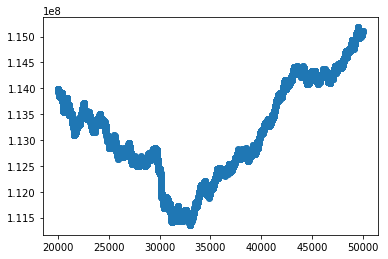

In [132]:
plt.scatter(x,res)
plt.show()

In [133]:
best_N

32997

In [128]:
best_score

113949000

In [100]:
best_N

8100

In [81]:
fraudulent = data_set_with_label.head(0)

In [82]:
M = len(test_y[test_y == 'suspicious']) - len(set(fraudulent.index) & set(test_y.keys()))

In [86]:
1000*0+60000*M

168360000

In [84]:
M

2806

In [85]:
len(test_y[test_y == 'suspicious'])

2806

In [74]:
2806*60000

168360000

In [57]:
from scipy.optimize import minimize

In [59]:
y_predicted = clf_bag.predict_proba(test_x)
data_set_with_label = test_x.copy(deep=True)
data_set_with_label['label'] = y_predicted[:,1]
data_set_with_label = data_set_with_label.sort_values(by='label',ascending=False)

In [61]:
minimize(get_cost, 0, args=( data_set_with_label, test_y, test_x))

TypeError: unhashable type: 'slice'

In [35]:
train_poly_x['poly_turno'] = train_poly_x['turnover']**2
train_poly_x['poly_inactive_days_average'] = train_poly_x['inactive_days_average']**2
train_poly_x['poly_channel_risk'] = train_poly_x['channel_risk']**2

C:\Users\Raphael\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Raphael\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Raphael\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [38]:
bg_cla_poly =  BaggingClassifier(base_estimator = RandomForestClassifier())
bg_cla_poly.fit(train_poly_x,train_poly_y)

C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\ensemble\forest

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [39]:
test_poly_x['poly_turno'] = test_poly_x['turnover']**2
test_poly_x['poly_inactive_days_average'] = test_poly_x['inactive_days_average']**2
test_poly_x['poly_channel_risk'] = test_poly_x['channel_risk']**2

C:\Users\Raphael\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Raphael\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Raphael\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [41]:
bg_cla_poly.fit(test_poly_x,test_poly_y)

C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\ensemble\forest

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

                precision    recall  f1-score   support

non suspicious       0.99      1.00      1.00    198157
    suspicious       1.00      0.28      0.43      1843

     micro avg       0.99      0.99      0.99    200000
     macro avg       1.00      0.64      0.72    200000
  weighted avg       0.99      0.99      0.99    200000



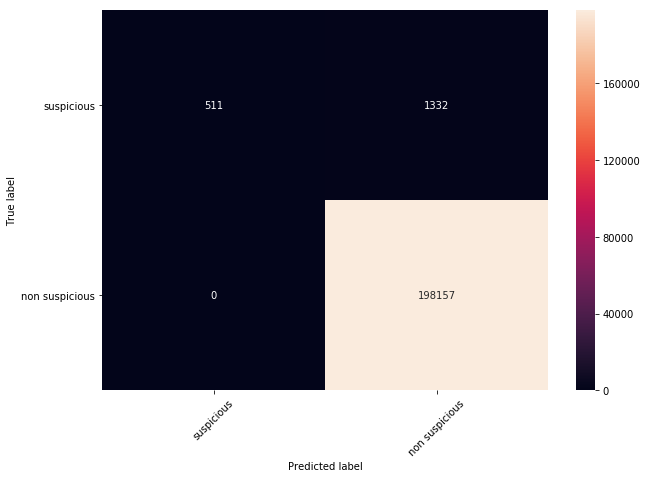

In [42]:
evaluate_classifier(bg_cla_poly,test_poly_x,test_poly_y)

In [43]:
predicted_labels = bg_cla_poly.predict_proba(data_test)
data_set_with_label = data_test.copy(deep=True)
data_set_with_label['label'] = predicted_labels[:,1]
data_set_with_label = data_set_with_label.sort_values(by='label',ascending=False)
aaa = data_set_with_label.head(1000)
aaa.index.to_frame().to_csv("raf.csv",index=False)

In [14]:
from imblearn.over_sampling import SMOTE

In [23]:
len(train_y[train_y == 'non suspicious'])

792756

In [24]:
len(train_y[train_y == 'suspicious'])

7244

In [25]:
dict_ = {'non suspicious':len(train_y[train_y == 'non suspicious']),'suspicious':20000}

In [26]:
smote = SMOTE(sampling_strategy=dict_)
X_sm, y_sm = smote.fit_sample(train_x, train_y)

In [29]:
len(y_sm[y_sm == 'non suspicious'])

792756

In [30]:
c = np.c_[X_sm.reshape(len(X_sm), -1), y_sm.reshape(len(y_sm), -1)]
np.random.shuffle(c)
X_sm_2 = c[:, :X_sm.size//len(X_sm)].reshape(X_sm.shape)
y_sm_2 = c[:, X_sm.size//len(X_sm):].reshape(y_sm.shape)

In [31]:
clf_bag3 = BaggingClassifier(base_estimator = RandomForestClassifier())
clf_bag3.fit(X_sm_2,y_sm_2)

C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\ensemble\forest

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

                precision    recall  f1-score   support

non suspicious       0.99      1.00      1.00    198157
    suspicious       0.66      0.05      0.10      1843

     micro avg       0.99      0.99      0.99    200000
     macro avg       0.83      0.53      0.55    200000
  weighted avg       0.99      0.99      0.99    200000



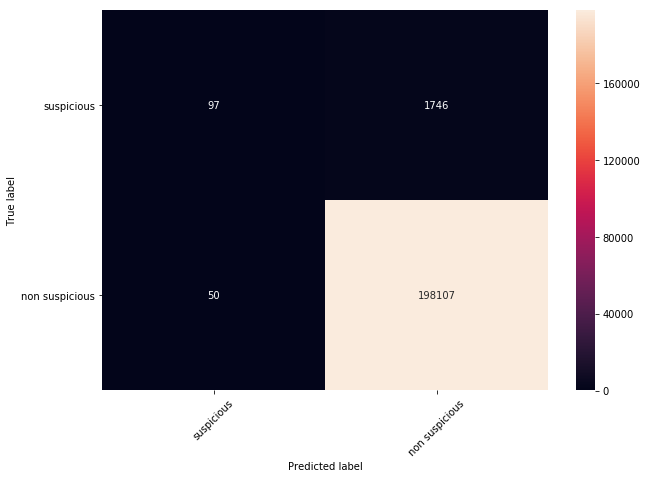

In [32]:
evaluate_classifier(clf_bag3,test_x,test_y)

In [54]:
clf_bag = BaggingClassifier(base_estimator = RandomForestClassifier())
clf_bag.fit(train_x, train_y)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [57]:
data_test.drop('nationality', axis=1, inplace=True)
data_test.drop('category', axis=1, inplace=True)
data_test.drop('is_pep', axis=1, inplace=True)

In [59]:
predicted_labels = clf_bag.predict_proba(data_test)
data_set_with_label = data_test.copy(deep=True)
data_set_with_label['label'] = predicted_labels[:,1]
data_set_with_label = data_set_with_label.sort_values(by='label',ascending=False)
aaa = data_set_with_label.head(1000)
aaa.index.to_frame().to_csv("val.csv",index=False)